In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/attack_conversion.csv')
df['coef'] = (df['converted'] / df['original'] * 100).fillna(1)
display(df)

,original,converted,coef
0,0,0.0000,1.000000
1,5,0.0488,0.976000
2,10,0.0956,0.956000
3,15,0.1407,0.938000
4,20,0.1842,0.921000
5,25,0.2271,0.908400
6,30,0.2688,0.896000
7,35,0.3095,0.884286
8,40,0.3490,0.872500
9,45,0.3893,0.865111


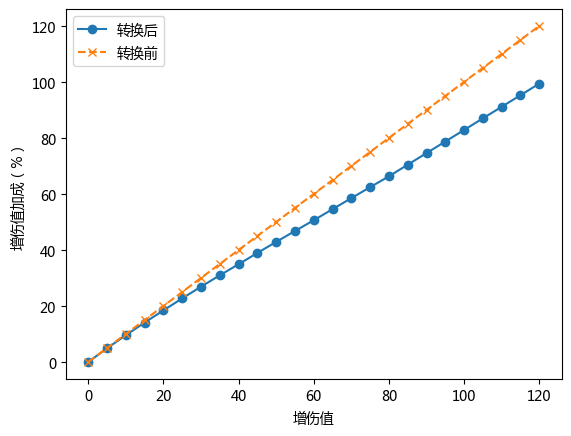

In [3]:
fig = plt.figure()
plt.plot(df['original'], df['converted'] * 100, 'o-', label='转换后')
plt.plot(df['original'], df['original'], 'x--', label='转换前')
plt.xlabel('增伤值')
plt.ylabel('增伤值加成（%）')
plt.legend(loc='best')
plt.show()

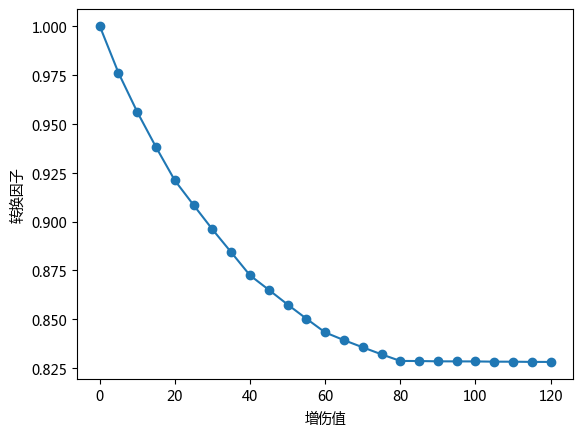

In [4]:
def viz_curve(x, y):
    fig = plt.figure()
    plt.plot(x, y, 'o-')
    plt.xlabel('增伤值')
    plt.ylabel('转换因子')


viz_curve(df['original'], df['coef'])

In [5]:
a = df[df['original'] <= 80]
b = df[df['original'] >= 80]

,original,converted,coef
0,0,0.0000,1.000000
1,5,0.0488,0.976000
2,10,0.0956,0.956000
3,15,0.1407,0.938000
4,20,0.1842,0.921000
5,25,0.2271,0.908400
6,30,0.2688,0.896000
7,35,0.3095,0.884286
8,40,0.3490,0.872500
9,45,0.3893,0.865111


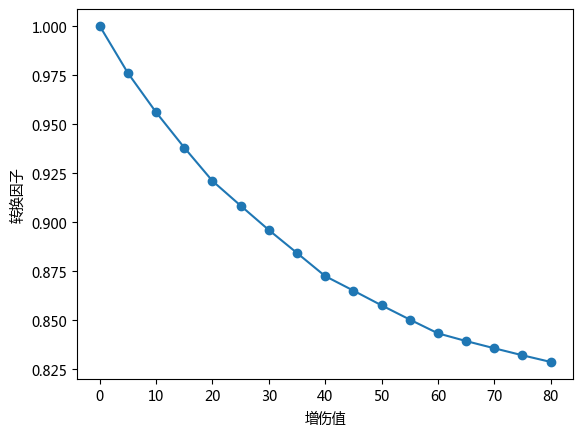

In [6]:
display(a)
viz_curve(a['original'], a['coef'])

[ 0.19907302 39.81090018  0.80101899]


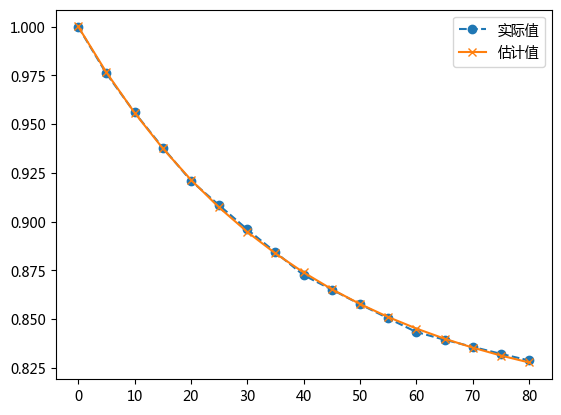

array([ 0.19907302, 39.81090018,  0.80101899])

In [7]:
# 拟合指数曲线
def target_func(x, a0, a1, a2):
    return a0 * np.exp(-x / a1) + a2


def fit(x, args, func):
    return np.array([func(v, *args) for v in x])


def guess_func(x, y, func):
    fig = plt.figure()
    plt.plot(x, y, 'o--', label='实际值')

    para, cov = optimize.curve_fit(func, x, y)
    print(para)
    y_fit = fit(x, para, func)
    plt.plot(x, y_fit, 'x-', label='估计值')
    plt.legend()
    plt.show()
    return para


x = a['original']
y = a['coef']
guess_func(x, y, target_func)

,x,truth,pred,rel_delta
0,0,0.00,0.000000,0.000000
1,5,4.88,4.882497,0.051166
2,10,9.56,9.557602,-0.025088
3,15,14.07,14.061868,-0.057798
4,20,18.42,18.426123,0.033239
5,25,22.71,22.676307,-0.148361
6,30,26.88,26.834199,-0.170389
7,35,30.95,30.918034,-0.103282
8,40,34.90,34.943036,0.123311
9,45,38.93,38.921872,-0.020878


,x,truth,pred,rel_delta
2,10,9.56,9.557602,-0.025088
4,20,18.42,18.426123,0.033239
8,40,34.90,34.943036,0.123311
16,80,66.30,66.165365,-0.203070


Text(0.5, 1.0, '增伤值<=80时')

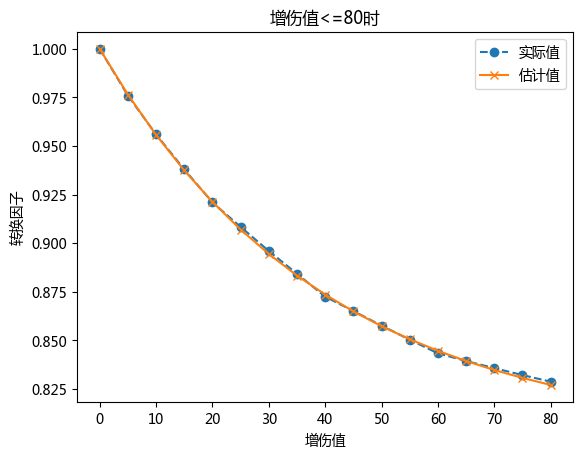

In [8]:
def viz_fit(x, y, params, func):
    y_fit = fit(x, params, func)
    diff = y_fit - y
    ratio = diff * 100 / y
    prediction = pd.DataFrame(dict(x=x, truth=y * x, pred=y_fit * x, rel_delta=ratio))
    focus = prediction[prediction['x'].isin({10, 20, 40, 80, 120})]
    display(prediction)
    display(focus)

    fig = plt.figure()
    plt.plot(x, y, 'o--', label='实际值')
    plt.plot(x, y_fit, 'x-', label='估计值')
    plt.legend()
    plt.xlabel('增伤值')
    plt.ylabel('转换因子')


params = (0.2, 40, 0.8)
viz_fit(a['original'], a['coef'], params, target_func)
plt.title("增伤值<=80时")

,original,converted,coef
16,80,0.6630,0.828750
17,85,0.7044,0.828706
18,90,0.7457,0.828556
19,95,0.7871,0.828526
20,100,0.8285,0.828500
21,105,0.8698,0.828381
22,110,0.9112,0.828364
23,115,0.9525,0.828261
24,120,0.9939,0.828250


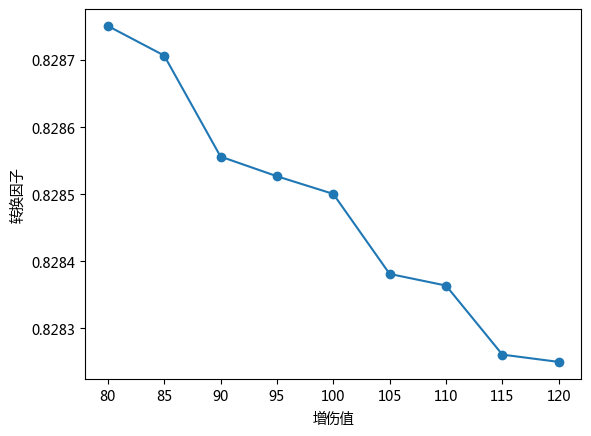

In [9]:
display(b)
viz_curve(b['original'], b['coef'])

[-1.26559999e-05  8.29742068e-01]


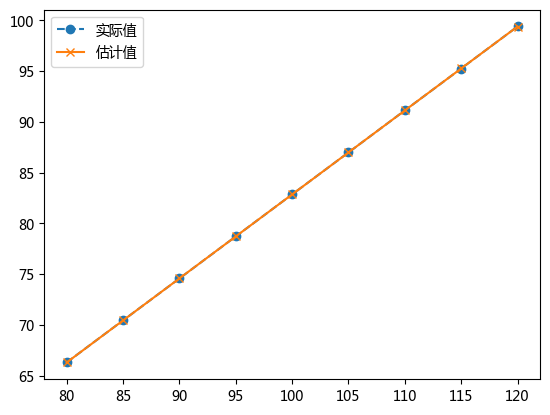

In [10]:
params = guess_func(b['original'], b['converted'] * 100, lambda x, a0, a1: (a0 * x + a1) * x)

In [11]:
def linear_fit(x, y):
    z1 = np.polyfit(x, y, 1)  #一次多项式拟合，相当于线性拟合
    p1 = np.poly1d(z1)
    return z1


params = linear_fit(b['original'], b['coef'])
print(list(map(lambda x: x.item(), params)))

[-1.2880800518433902e-05, 0.8297651036082629]


,x,truth,pred,rel_delta
16,80,66.30,66.298771,-0.001853
17,85,70.44,70.436970,-0.004302
18,90,74.57,74.574525,0.006068
19,95,78.71,78.711436,0.001824
20,100,82.85,82.847702,-0.002773
21,105,86.98,86.983325,0.003823
22,110,91.12,91.118304,-0.001862
23,115,95.25,95.252638,0.002770
24,120,99.39,99.386329,-0.003694


,x,truth,pred,rel_delta
16,80,66.30,66.298771,-0.001853
24,120,99.39,99.386329,-0.003694


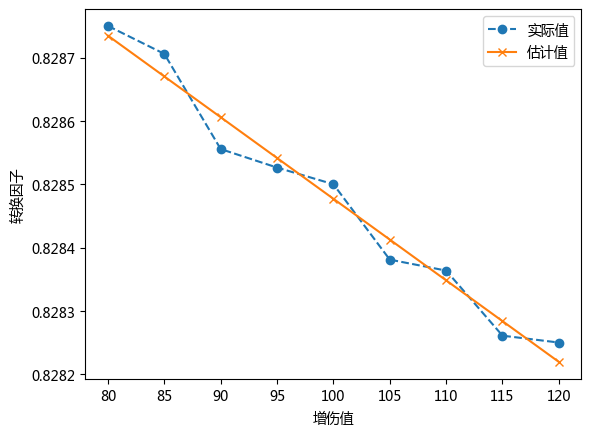

In [12]:
# k = -1.288e-05
k = 100 / 65535 - 0.82875 / (65535 - 80)
# h = 0.829765
h = 0.82875 - 80 * k
viz_fit(b['original'], b['coef'], params, lambda x, k, b: k * x + b)
# viz_fit(b['original'], b['coef'], (k, h), lambda x, k, b: k * x + b)

In [13]:
def predictor(x):
    if x < 80:
        return x * (0.002 * np.exp(-x / 40) + 0.008)
    return x * (-1.2656 * x / 10000000 + 0.0083)


predictor_vec = np.vectorize(predictor)
df['predicted'] = predictor_vec(df['original'])
df['diff'] = df['predicted'] - df['converted']
df['ratio'] = df['diff'] / df['converted']
result = df[['original', 'converted', 'predicted', 'diff', 'ratio']]
display(result)
result.to_csv('../output_data/prediction.csv', index=False)

,original,converted,predicted,diff,ratio
0,0,0.0000,0.000000,0.000000,NaN
1,5,0.0488,0.048825,0.000025,0.000512
2,10,0.0956,0.095576,-0.000024,-0.000251
3,15,0.1407,0.140619,-0.000081,-0.000578
4,20,0.1842,0.184261,0.000061,0.000332
5,25,0.2271,0.226763,-0.000337,-0.001484
6,30,0.2688,0.268342,-0.000458,-0.001704
7,35,0.3095,0.309180,-0.000320,-0.001033
8,40,0.3490,0.349430,0.000430,0.001233
9,45,0.3893,0.389219,-0.000081,-0.000209
